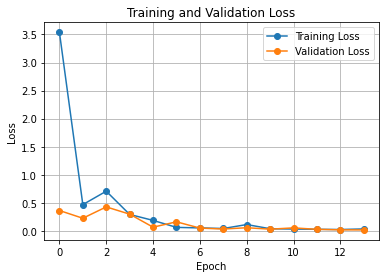

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = {
    "Training Loss": [3.5389454330340864, 0.4691686573250442, 0.7079983213709979, 0.2940088710231645, 0.18806475068451547, 0.06370566013832175, 0.05402142845463468, 0.043739609772599185, 0.11386643616221469, 0.03973076751714121, 0.033720866218209716, 0.02972049690816475, 0.025602710549467205, 0.03615693318154765],
    "Validation Loss": [0.3640980414486593, 0.22629232323503484, 0.42830486810456314, 0.2991041685781872, 0.06738892375547842, 0.1624996133168149, 0.050988787459047946, 0.03423600328043309, 0.05732378380857428, 0.03157609285580929, 0.05475703530383049, 0.028853177336030145, 0.019943888578766545, 0.018468546678732326]
}
df = pd.DataFrame(data)

# Plot the data
df.plot(y=["Training Loss", "Validation Loss"], marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.grid(True)
plt.show()

In [28]:
import torch
import torch.nn as nn

class Custom_MAE(nn.Module):
    def __init__(self, threshold):
        super().__init__()
        self.threshold = threshold
        self.one = 1

    def forward(self, y_pred, y_true):
        # if difference is greater than the threshold, penalize more
        abs_diff = torch.abs(y_pred - y_true)
        print(abs_diff)
        small_dev_mask = (abs_diff >= self.threshold) & (abs_diff < 1)
        #small_dev_mask = abs_diff >= self.threshold

        # penalize for all abs_diff that are greater than the threshold 
        # to ensure penalization of small (yet still significant) deviations from true value
        loss = torch.where(small_dev_mask, 1 / (abs_diff**2), abs_diff**2)
    
        return torch.mean(loss)

In [29]:
y_pred = torch.tensor([0.1,0.2])
y_true = torch.tensor([0.3,0.5])

loss = Custom_MAE(0.05)

loss(y_pred,y_true )

tensor([0.2000, 0.3000])


tensor(18.0556)